# GAN Cookbook Chapter 1 and 2 takeaways

## Chapter 1

In [ ]:
# Template for Generator

# class Generator:
#   def __init__(self):
#     self.initVariable = 1

#   def lossFunction(self):

#     return

#   def buildModel(self):

#     return

#   def trainModel(self, input_x, input_y):

#     return

In [ ]:
# Template for Discriminator

# class Discriminator:
#   def __init__(self):
#     self.initVariable=1

#   def lossFunction(self):

#     return

#   def buildModel(self):

#     return

#   def trainModel(self, input_x, input_y):

#     return

In [ ]:
# Template for loss

# class Loss:
#   def __init__(self):
#     self.initVariable =1

#   def lossBaseFunction1(self):

#     return

#   def lossBaseFunction2(self):

#     return

#   def lossBaseFunction3(self):

#     return

## Chapter 2

Take your time to preprocess the data, ensuring that the data we're using encompasses the entire trade space of possibilities for our application

Data Pipeline:
  1. Data preprocessing
  2. Balancing data
  3. Anomalous data
  4. Data augmentation

The steps for producing a data processing pipeline
  1. Read in data as NumPy array
  2. Check the distribution of the data for anomalous indices
  3. Balance the dataset for the learning step
  4. Throw out the anomalous data
  5. Augment our data in an Structured and intelligent manner

In [1]:
!docker volume ls -q -f driver=nvidia-docker | xargs -r -I{} -n1 docker ps -q -a -f volume={} | xargs -r docker rm -f
!sudo apt-get purge -y nvidia-docker

/bin/bash: docker: command not found
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package 'nvidia-docker' is not installed, so not removed
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [2]:
!curl -s -L https://nvidia.github.io/nvidia-docker/gpgkey | \sudo apt-key add -distribution=$(./etc/tos-release;echo $ID$VERSION_ID)
!curl -s -L https://nvidia.github.io/nvidia-docker/$distribution/nvidia-docker.list | \sudo tee /etc/apt/sources.list.d/nvidia-docker.list
!sudo apt-get update

/bin/bash: ./etc/tos-release: No such file or directory
gpg: conflicting commands
(23) Failed writing body
# Unsupported distribution!
# Check https://nvidia.github.io/nvidia-docker
Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ Packages [82.8 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Hit:6 http://archive.ubuntu.com/ubuntu focal InRelease
Get:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:10 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,866 kB]
Get:11 http://archive.ubuntu.com/ubuntu focal-ba

In [3]:
!sudo apt-get install -y nvidia-docker2
!sudo pkill -SIGHUP dockerd

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  apparmor bridge-utils containerd dns-root-data dnsmasq-base docker.io
  iptables libidn11 libip6tc2 libnetfilter-conntrack3 libnfnetlink0 libnftnl11
  libnvidia-container-tools libnvidia-container1 netbase netcat netcat-openbsd
  nvidia-container-toolkit nvidia-container-toolkit-base pigz runc ubuntu-fan
Suggested packages:
  apparmor-profiles-extra apparmor-utils ifupdown aufs-tools btrfs-progs
  cgroupfs-mount | cgroup-lite debootstrap docker-doc rinse zfs-fuse
  | zfsutils firewalld nftables
The following NEW packages will be installed:
  apparmor bridge-utils containerd dns-root-data dnsmasq-base docker.io
  iptables libidn11 libip6tc2 libnetfilter-conntrack3 libnfnetlink0 libnftnl11
  libnvidia-container-tools libnvidia-container1 netbase netcat netcat-openbsd
  nvidia-container-toolkit nvidia-container-toolkit-base nvidia-docker2 p

In [4]:
!docker run --runtime=nvidia --rm nvidia/cuda nvidia-smi

docker: Cannot connect to the Docker daemon at unix:///var/run/docker.sock. Is the docker daemon running?.
See 'docker run --help'.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df0 = pd.read_csv('/content/drive/MyDrive/UCI_ML_Income_data/adult.data', names = ['age', 'workclass',
                      'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race',
                       'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','Label'])
df0.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
mappings = {}
for col_name in df0.columns:
  if(df0[col_name].dtype == 'object'):
    df0[col_name] = df0[col_name].astype('category')
    df0[col_name], mapping_index = pd.Series(df0[col_name]).factorize()

    mappings[col_name] = {}
    for i in range(len(mapping_index.categories)):
      mappings[col_name][i] = mapping_index.categories[i]
  else:
    mappings[col_name] = 'continuous'

## Univariate method
  Focuses on removing values that fall far away from the median value for a single value. The evaluation metric is called the "*Cleaning Parameter*". This parameter will define which values to remove from the distribution. Choosing an aggressive cleaning parameter could remove diverse data. On the contrary, choosing too large of a cleaning parameter won't change much about the distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

In [3]:
x = np.linspace(-5,5,200)
y = np.exp(-x**2) + np.random.randn(200)/10

In [4]:
s = UnivariateSpline(x,y, s=1)

In [5]:
xs = np.linspace(-5,5,1000)
ys = s(xs)

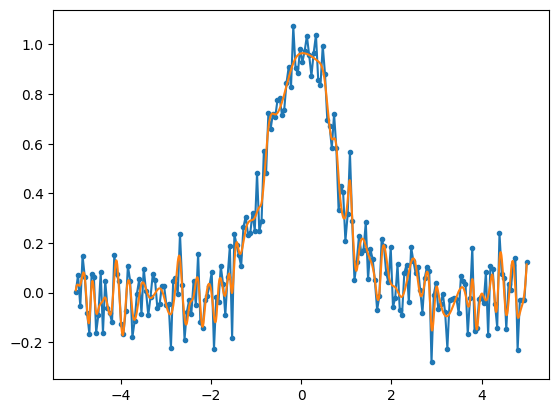

In [6]:
plt.plot(x,y,'.-')
plt.plot(xs,ys)
plt.show()

Here's another really simple way to visualize the outliers in a dataset:
https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm.
The following link is to an article that focuses on practical graphing techniques for
multivariate problems:
https://machinelearningmastery.com/visualize-machine-learning-data-pythonpandas/.

## Balancing Data
Balancing data and handling anomalous data are often thought of as the same process. In
our case, data balancing involves understanding the techniques used to spread anomalous
data without disrupting the underlying data distribution.

Two predominant sets of class of techniques to fix imbalance are as follows:
1. Sampling techniques
2. Ensemble techniques

These techniques focus on sampling the data in a constructive or destructive way to achieve
a better balanced distribution or working on the learning side to ensemble multiple learners
together to form a consensus on a problem set.

### Sampling Techniques

In [7]:
"""
  focuses on solving the issues through manipulation of the data-similar to removing
  anomalous data, by modifying the data distribution to make sure that the data is balanced

  Random Undersampling
    Randomly undersample the majority class in a distribution to make it match the distribution of other minority classes
    In generative paradigm, undersampling can bias the model to over-represent minority cases
"""
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler


In [9]:
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.15,0.95], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=2, n_samples=1000, random_state=69)

In [11]:
pca = PCA(n_components=3)
X_vis = pca.fit_transform(X)

In [15]:
rus = RandomUnderSampler(random_state = 69)
X_resampled, y_resampled = rus.fit_resample(X, y)
X_res_vis = pca.transform(X_resampled)

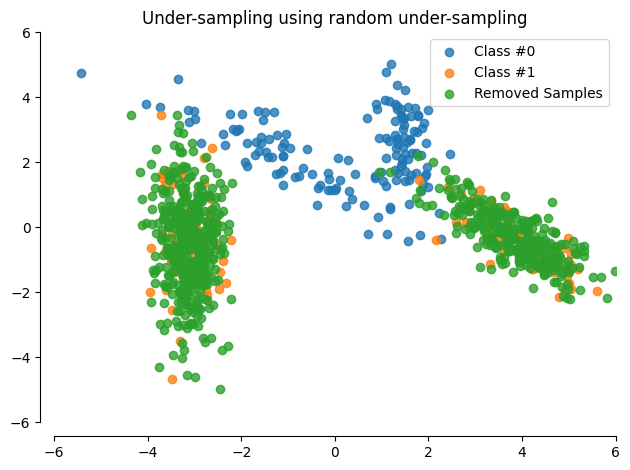

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

idx_samples_removed = np.setdiff1d(np.arange(X_vis.shape[0]), rus.sample_indices_)

idx_class_0 = y_resampled == 0
plt.scatter(X_res_vis[idx_class_0,0], X_res_vis[idx_class_0,1], alpha = 0.8, label='Class #0')
plt.scatter(X_res_vis[~idx_class_0,0], X_res_vis[~idx_class_0,1], alpha = 0.8, label='Class #1')
plt.scatter(X_vis[idx_samples_removed,0], X_vis[idx_samples_removed,1], alpha=0.8, label="Removed Samples")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward',10))
ax.spines['bottom'].set_position(('outward',10))
ax.set_xlim([-6,6])
ax.set_ylim([-6,6])

plt.title('Under-sampling using random under-sampling')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
"""
  Random Oversampling
    increase the number of instances in the minority classes by either randomly duplicating instances of the minority classes until
    they match the distribution of the majority class
    The sampling can become biased depending on the technique and so it's important to understand the underlying strategy
  Synthetic Minority Oversampling Technique (SMOTE)
    involve creating synthetic examples of the minority class through this technique
    sometimes simple duplicating minority examples, or reducing majority examples is not enough, SMOTE bridges this special case
    This website offers a solid explanation of how SMOTE works:
    https://www.cs.cmu.edu/afs/cs/project/jair/pub/volume16/chawla02a-html/chawla2002.html.
    And there is a simple implementation in the scikit-learn imbalanced library:
    http://contrib.scikit-learn.org/imbalanced-learn/stable/generated/imblearn.over_sampling.SMOTE.html.
    Finally, check out the imbalanced library here:
    http://contrib.scikit-learn.org/imbalanced-learn/stable/index.html.
"""
# import imblearn #for balancing data

### Ensemble Tecniques

Using multiple learners in an ensemble (group) to come to a combined output. Obviously, this is going to be harder in a generative paradigm.

1. Bagging

  works by sampling a smaller set of data and matching the distribution of the greater set of data-the algorithms are then trained on these smaller sets and later fused to form a single decision. Bagging will only help with learners that are capable-learning a bunch of bad models will lead to bad results.
2. Boosting

  works by taking weak learners and combining their decisions or outputs to produce a strong output. Boosting will weight the outputs of the different learners to improve the output of the ensemble until some stopping criteria is met.

3. AdaBoost

  Adaptive Boosting takes boosting and applies rules to the boosting step. By adding simple rules, the ensemble is allowed to adapt to different anomalies to predict. This technique can be sensitive to the rule set and extreme outliers in the data.




## Data Augmentation
One image can be altered or corrupted to encourage deep learning techniques to generalize for the objective, rather than focusing on single features.

Augmentations will force learners to generalize

In [22]:
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np

In [23]:
ia.seed(69)

In [25]:
# example batch of 100 images
images = np.array(
    [ia.quokka(size=(64,64)) for _ in range(100)],
    dtype=np.uint8
)

In [26]:
#transformer function by specifying the different augmentations
seq = iaa.Sequential([#Horizontal flips
                      iaa.Fliplr(0.5),
                      #random crops
                      iaa.Crop(percent=(0,0.1)),
                      #Gaussian Blur for 50% of the images
                      iaa.Sometimes(0.5,iaa.GaussianBlur(sigma=(0,0.5))),
                      # Strengthen or weaken the contrast in each image
                      iaa.ContrastNormalization((0.75,1.5)),
                      #add gaussian noise
                      iaa.AdditiveGaussianNoise(loc=0,scale=(0.0,0.05*255),per_channel=0.5),
                      #make some images brighter and some darker
                      iaa.Multiply((0.8,1.2), per_channel=0.2),
                      #apply affine transformation to each image
                      iaa.Affine(
                          scale={"x":(0.5,1.5),"y":(0.5,1.5)},
                          translate_percent = {"x":(-0.5,0.5), "y":(-0.5,0.5)},
                          rotate = (-10,10),
                          shear=(-10,10)
                      )
                      ], random_order=True)

/usr/local/lib/python3.10/dist-packages/imgaug/imgaug.py:184: DeprecationWarning: Function `ContrastNormalization()` is deprecated. Use `imgaug.contrast.LinearContrast` instead.
  warn_deprecated(msg, stacklevel=3)


In [ ]:
images_aug = seq.augment_images(images)
seq.draw_grid(images[0], cols=8, rows=8)

In [35]:
%matplotlib inline

In [42]:
images_aug.shape

(100, 64, 64, 3)

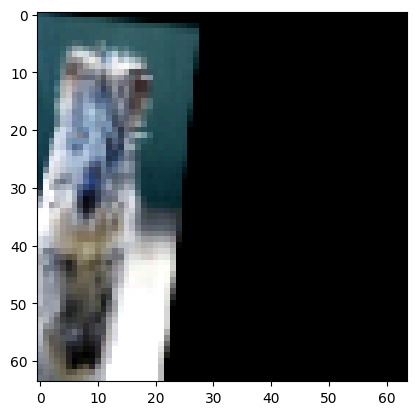

In [46]:
plt.imshow(images_aug[42])
plt.show()

Data augmentation, however- that is randomly chosen without benchmarks
for your learners- can lead to decreased performance for the learners in the long run.
